<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Степан!</b>

Меня зовут Алексей Косенко, и я буду проверять твой проект.
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, если ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> твой комментарий
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-Возможно,-стоит-также-провести-upsampling-или-downsampling-примеров-бывших-клиентов?-" data-toc-modified-id="-Возможно,-стоит-также-провести-upsampling-или-downsampling-примеров-бывших-клиентов?--3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span> Возможно, стоит также провести upsampling или downsampling примеров бывших клиентов? </a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#-Вывод-после-стратификации:-модель-с-балансировкой-классов-и-upsampling-на-тестовой-выборке-показала-наилучший-результат.-Также-результаты-после-стратификации-в-целом-в" data-toc-modified-id="-Вывод-после-стратификации:-модель-с-балансировкой-классов-и-upsampling-на-тестовой-выборке-показала-наилучший-результат.-Также-результаты-после-стратификации-в-целом-в-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span> Вывод после стратификации: модель с балансировкой классов и upsampling на тестовой выборке показала наилучший результат. Также результаты после стратификации в целом в</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import scipy.stats as stats

In [2]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

#импорт необходимых библиотек
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

from sklearn.preprocessing import OrdinalEncoder

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [3]:
data = pd.read_csv('/datasets/Churn.csv')
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
display(data['NumOfProducts'].corr(data['Exited']))
stats.pointbiserialr(data['NumOfProducts'], data['Exited'])

-0.0478198649494405

PointbiserialrResult(correlation=-0.04781986494944057, pvalue=1.7173330048138772e-06)

**Вывод по данным:** данные полны, однако имеются значительные пропуски в столбце Tenure — сколько лет человек является клиентом банка. Это может затруднить анализ. 
- [x] Возможно, стоит убрать строки, в которых отсутствует этот показатель?

В таблице 7 качественнных (один из них целевой – Exited) и 7 количественных переменных. Количественные переменные, такие как номер столбца по порядку (RowNumber) и ID абонента (CustomerId) в анализе точно не пригодятся. Качественный признак Surname тоже анализу ничего полезного не даст. Остается по 5 признаков для анализа. 

По дисбалансу классов: по целевому признаку не такая большая разница в количесвте "положительных" и "отрицательных" ответов, поэтому не считаю важным делать upsampling или downsampling. 

In [5]:
data = data.dropna(subset=['Tenure'])
print(data[data['Tenure'].isna()])

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


Так как медианным значением заполнять не очень корректно – распределение не нормальное, я решил убрать строки, содержащие пропуски в годах клиентства

## Исследование задачи

**Так как в данных есть и количественные и качественные данные, выбор стоит между деревом решений и случайным лесом. Данных относительно немного, поэтому есть возможность сразу применить более качественный и долее долгий метод – случайный лес.**

In [6]:
#разделение на выборки для обучения
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns=data.columns)
print(data_ordinal.head())

   RowNumber  CustomerId  Surname  CreditScore  Geography  Gender   Age  \
0        0.0      2467.0   1063.0        226.0        0.0     0.0  24.0   
1        1.0      2941.0   1120.0        215.0        2.0     0.0  23.0   
2        2.0      1894.0   1933.0        109.0        0.0     0.0  24.0   
3        3.0      4933.0    270.0        306.0        0.0     0.0  21.0   
4        4.0      6282.0   1721.0        457.0        2.0     0.0  25.0   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0     2.0      0.0            0.0        1.0             1.0           4609.0   
1     1.0    679.0            0.0        0.0             1.0           5119.0   
2     8.0   5277.0            2.0        1.0             0.0           5182.0   
3     1.0      0.0            1.0        0.0             0.0           4274.0   
4     2.0   3374.0            0.0        1.0             1.0           3559.0   

   Exited  
0     1.0  
1     0.0  
2     1.0  
3     0.0  
4 

In [7]:
data_train, data_test = train_test_split(data_ordinal, test_size=0.25, random_state=12345, stratify=data_ordinal['Exited'])

In [8]:
features = data_train.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
target = data_train['Exited']

In [9]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345, stratify=target)
display(features_train.shape, target_train.shape)

(5113, 10)

(5113,)

In [10]:
%%time

best_model = None
best_result = 0
for est in range(10, 501, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result

print('Лучшая модель:', best_model)
print('F1 наилучшей модели на валидационной выборке:', best_result)

Лучшая модель: RandomForestClassifier(max_depth=9, n_estimators=30, random_state=12345)
F1 наилучшей модели на валидационной выборке: 0.5597014925373134
CPU times: user 7min 23s, sys: 1.95 s, total: 7min 25s
Wall time: 7min 25s


Метрика F1 при наилучшем раскладе, но с дисбалансом классов по прежнему не дотягивает до заданной планки в 0.59. 

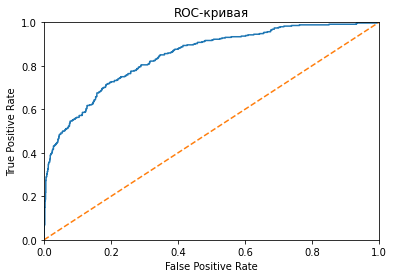

0.8458228512862213

In [11]:
predicted_probability_valid = best_model.predict_proba(features_valid)
ppv = predicted_probability_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, ppv)

plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()
best_model_auc = roc_auc_score(target_valid, ppv)
display(roc_auc_score(target_valid, ppv))

ROC-кривая и площадь под ней говорят, что модель хорошая, так как значение AUC значительно больше 0.5 – случайного значения.

## Борьба с дисбалансом

In [ ]:
%%time

best_model_balanced = None
best_result_balanced = 0
for est in range(10, 501, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result_balanced:
            best_model_balanced = model
            best_result_balanced = result

print('Лучшая модель:', best_model_balanced)
print('F1 наилучшей модели на валидационной выборке:', best_result_balanced)

**При балансировке классов наблюдается существенная разница – F1 стал выше порогового значения. Нужно еще проверить, не переобучилась ли модаль, на тестовой выборке.**

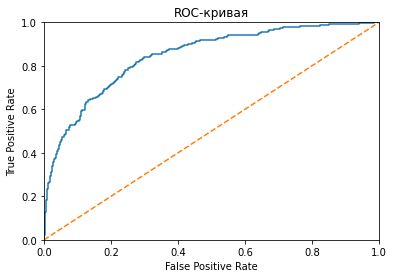

0.845096519536842

In [13]:
predicted_probability_test = best_model_balanced.predict_proba(features_valid)
ppt = predicted_probability_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, ppt)

plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()
best_balanced_auc = roc_auc_score(target_valid, ppt)
display(roc_auc_score(target_valid, ppt))

Несмотря на увеличение F1 метрики, площадь под кривой уменьшилась. 

<h4> Возможно, стоит также провести upsampling или downsampling примеров бывших клиентов? </h4>

In [14]:
features_upsamp = resample((features_train[target_train == 1.0]), replace=True, n_samples=len(features_train[target_train == 0.0]), random_state=12345)
features_upsamp = pd.concat([features_upsamp, features_train[target_train == 0.0]])
target_upsamp = resample((target_train[target_train == 1.0]), replace=True, n_samples=len(features_train[target_train == 0.0]), random_state=12345)
target_upsamp = pd.concat([target_upsamp, target_train[target_train == 0.0]])

print(target_upsamp.shape, features_upsamp.shape)
target_upsamp.describe()

features_dowsamp = resample((features_train[target_train == 0.0]), replace=True, n_samples=len(features_train[target_train == 1.0]), random_state=12345)
features_dowsamp = pd.concat([features_dowsamp, features_train[target_train == 1.0]])
target_dowsamp = resample((target_train[target_train == 0.0]), replace=True, n_samples=len(features_train[target_train == 1.0]), random_state=12345)
target_dowsamp = pd.concat([target_dowsamp, target_train[target_train == 1.0]])

(8142,) (8142, 10)


In [15]:
%%time

best_model_upsamp = None
best_result_upsamp = 0
for est in range(10, 501, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_upsamp, target_upsamp)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result_upsamp:
            best_model_upsamp = model
            best_result_upsamp = result

print('Лучшая модель:', best_model_upsamp)
print('F1 наилучшей модели на валидационной выборке:', best_result_upsamp)

Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=150,
                       random_state=12345)
F1 наилучшей модели на валидационной выборке: 0.6060606060606061
CPU times: user 9min 28s, sys: 2.46 s, total: 9min 30s
Wall time: 9min 31s


После upsampling'а F1 выросла на 0.2% при проверке на тренировочной выборке.

In [16]:
%%time

best_model_dowsamp = None
best_result_dowsamp = 0
for est in range(10, 501, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_dowsamp, target_dowsamp)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result_dowsamp:
            best_model_dowsamp = model
            best_result_dowsamp = result

print('Лучшая модель:', best_model_dowsamp)
print('F1 наилучшей модели на валидационной выборке:', best_result_dowsamp)

Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=20,
                       random_state=12345)
F1 наилучшей модели на валидационной выборке: 0.5838218053927315
CPU times: user 4min 42s, sys: 1.65 s, total: 4min 43s
Wall time: 4min 44s


Downsampling качество модели понизил. 

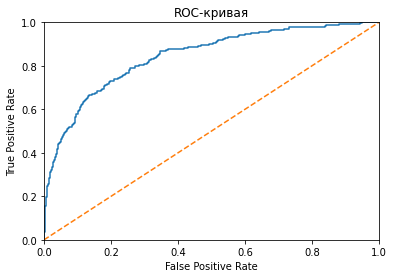

0.8436629143055591

In [17]:
#AUC-ROC модели с балансом классов и upsampling
predicted_probability_upsamp = best_model_upsamp.predict_proba(features_valid)
ppu = predicted_probability_upsamp[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, ppu)

plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

best_upsamp_auc = roc_auc_score(target_valid, ppu)
plt.show()
display(roc_auc_score(target_valid, ppu))

После upsampling площадь под кривой увеличилась – точночть выросла вместе с F1 мерой. 

In [18]:
pivot = pd.DataFrame([['Модель без балансировки', best_model, best_result, best_model_auc], ['Модель после балансировки', best_model_balanced, best_result_balanced, best_balanced_auc], ['Балансировка + upsampling', best_model_upsamp, best_result_upsamp, best_upsamp_auc]], columns=['Название', 'Характеристики', 'F1-score', 'AUC-score'])
display(pivot)

Название  \
0    Модель без балансировки   
1  Модель после балансировки   
2  Балансировка + upsampling   

                                      Характеристики  F1-score  AUC-score  
0  (DecisionTreeClassifier(max_depth=9, max_featu...  0.559701   0.845823  
1  (DecisionTreeClassifier(max_depth=8, max_featu...  0.592105   0.845097  
2  (DecisionTreeClassifier(max_depth=9, max_featu...  0.606061   0.843663

**Общий вывод после обучения моделей: несколько более высокие результаты по F1 показывает модель с балансировкой классов и upsampling. Однако по площади под кривой модель без ups. лучше. Необходимо провести тестирование.**

## Тестирование модели

In [19]:
features_test = data_test.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
target_test = data_test['Exited']
display(features_test.shape, target_test.shape)

(2273, 10)

(2273,)

In [20]:
predict_test = best_model_balanced.predict(features_test)
result = f1_score(target_test, predict_test)

print(f'Результат теста модели {best_model_balanced}:', result)

Результат теста модели RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=210,
                       random_state=12345): 0.6091269841269841


In [21]:
predict_test = best_model_upsamp.predict(features_test)
result = f1_score(target_test, predict_test)

print(f'Результат теста модели {best_model_upsamp}:', result)

Результат теста модели RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=150,
                       random_state=12345): 0.6173570019723865


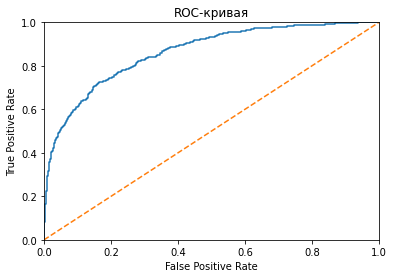

0.8623596576504451

In [22]:
predicted_probability_test = best_model_balanced.predict_proba(features_test)
ppt = predicted_probability_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, ppt)

plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()
display(roc_auc_score(target_test, ppt))

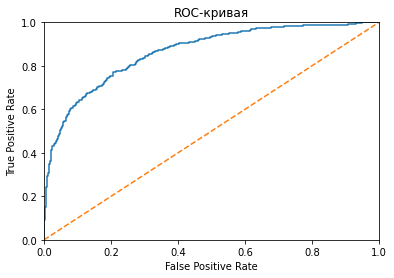

0.8642717923791008

In [23]:
predicted_probability_test = best_model_upsamp.predict_proba(features_test)
ppus = predicted_probability_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, ppus)

plt.figure()

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()
display(roc_auc_score(target_test, ppus))

На тестовой выборке ROC-кривая и значение AUC также значительно отличаются от случайного показателя, что говорит о качестве модели. Показатели модели, обученной на upsampling примере, все еще ниже. 

Старые выовды: Вывод: модель показывает себя стабильно на данных, которые она еще не видела. Целевое значение достигнуто – модель почти на 2% лучше минимального критерия. При этом, несмотря на то, что на валидации модель, обученная на искуственно измененном количестве примеров, показывала лучшие результаты, при тестировании оказалось, что она справляется хуже, чем модель, обученная на данных без применения ресемплинга. вероятно, присутствует фактор переобучения. 
<h3> Вывод после стратификации: модель с балансировкой классов и upsampling на тестовой выборке показала наилучший результат. Также результаты после стратификации в целом в</h3>